<a href="https://colab.research.google.com/github/joshuansu0897/RedNeuronal1/blob/main/numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [8]:
train_data.shape

(60000, 28, 28)

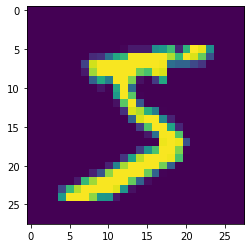

In [9]:
plt.imshow(train_data[0])

In [10]:
train_labels[0]

5

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
x_train = train_data.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [17]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
train_labels[0]

5

In [21]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2535 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1018 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9886


In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9811


[0.06575871258974075, 0.9811000227928162]

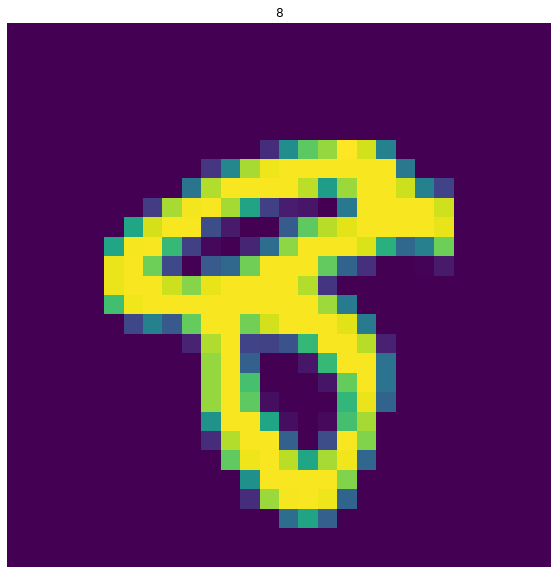

In [27]:
# Selecciona un numero al azar dentro de x_test

plt.figure(figsize=(10,10))

index = 1052
d_image = x_test[index]
plt.imshow(d_image.reshape(28, 28))
plt.title( np.argmax(y_test[index], axis=-1) ) # para ver el numero como tal
plt.axis(False)
plt.show()

In [26]:
prediccion_array = model.predict(x_test[index].reshape(1,28*28))

print('el numero es:',np.argmax(prediccion_array, axis=-1), 'cierto?')

el numero es: [8] cierto?
